## Importing Libs

In [1]:
import pandas as pd # used to load, manipulate the data and for one-hot encoding
import numpy as np # data manipulation
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # for downsample the dataset
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test split
from sklearn.preprocessing import scale # scale and center the data
from sklearn.svm import SVC # will make a SVM for classification
from sklearn.model_selection import GridSearchCV # will do the cross validation
from sklearn.metrics import plot_confusion_matrix # will draw the confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc
import seaborn as sns

## Load the data

In [2]:
data = pd.read_csv("../input/mri-and-alzheimers/oasis_longitudinal.csv")

## Explore the data

In [3]:
pd.set_option('display.max_columns', None) # will show the all columns with pandas dataframe
pd.set_option('display.max_rows', None) # will show the all rows with pandas dataframe

In [4]:
data.head()
# data.tail()
# data.size

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
data.shape

(373, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


## Converting Categorical Data to Numerical Data

When **inplace = True** , the data is modified in place, which means it will return nothing and the dataframe is now updated. 
When **inplace = False** , which is the *default*, then the operation is performed and it returns a copy of the object. You then need to save it to something.

set axis=0 for rows or, just put axis='rows' to access the rows

set axis=1 for columns or, just put axis='columns' to access the columns

In [7]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
# data['Group'] = data['Group'].replace(['Converted'], ['Demented']) # Target variable
# data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


Note: Based on the given data **CDR** is used to tell what the condition of the patient meaning, does the patient has any dementia or, not.

CDR Value Meaning:

* 0 ---> Normal
* 0.5 ---> Very Mild Dementia
* 1 ---> Mild Dementia
* 2 ---> Moderate Dementia
* 3 ---> Severe Dementia

## Correlation Between Attributes

In [8]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.778049
M/F         0.222146
SES         0.062463
ASF         0.032495
Age        -0.005941
eTIV       -0.042700
Visit      -0.095507
MR Delay   -0.120638
EDUC       -0.193060
nWBV       -0.311346
MMSE       -0.524775
Name: Group, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb5b81cd90>,
      dtype=object)

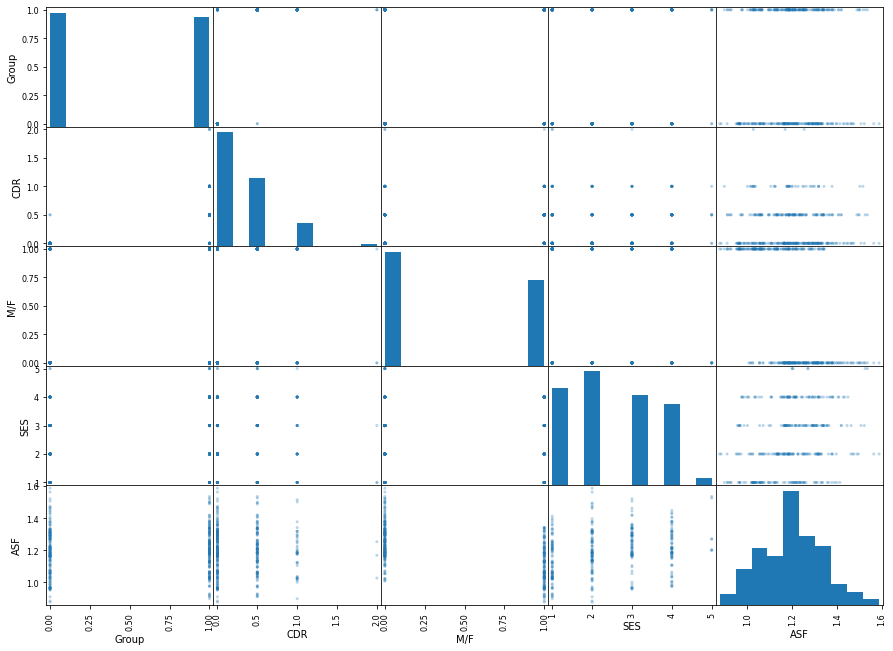

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["Group", "CDR", "M/F", "SES", "ASF"]

scatter_matrix(data[attributes], figsize=(15, 11), alpha=0.3)

In [10]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='SES', color='Group')
fig.show()

In [11]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='Age', color='Group')
fig.show()

In [12]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='ASF', color='Group')
fig.show()

## Checking For Missig/Null Values

In [13]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

### Taking median values for the missing values of MMSE

In [14]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

### Taking median values for the missing values of SES

In [15]:
median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Train-Test Split

## Prepare the data for X and y where, 

1. X = The columns/features for **making the prediction**
2. y = The **predicted value**

In [16]:
y = data['Group'].values
X = data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

### Train-Test distribution Without Stratified Sampling

In [17]:
# by default test_size= 0.25
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    158
1    140
Name: 0, dtype: int64

In Testing Split:
1    43
0    32
Name: 0, dtype: int64


### With Stratified Sampling

In [18]:
# by default test_size= 0.25
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state=42, stratify=y)


df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    152
1    146
Name: 0, dtype: int64

In Testing Split:
0    38
1    37
Name: 0, dtype: int64


### Scale the dataset

In [19]:
# here StandardScaler() means z = (x - u) / s
scaler = StandardScaler().fit(X_trainval)
#scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_trainval_scaled

array([[-0.87966444,  0.38449006, -0.87500081, ..., -0.30880564,
         0.16961408,  0.21548547],
       [ 1.13679712,  1.04832574, -0.87500081, ...,  1.23805919,
        -0.67676996, -1.21558429],
       [-0.87966444, -0.9431813 , -1.22928103, ..., -1.08511327,
         0.4605586 ,  1.14751551],
       ...,
       [-0.87966444, -0.01381135,  1.2506805 , ..., -0.92985174,
         0.01091708,  0.94202857],
       [-0.87966444, -1.20871557, -0.87500081, ..., -0.00978344,
         0.5663566 , -0.10742258],
       [-0.87966444,  0.11895579,  1.2506805 , ..., -1.38413547,
         0.4605586 ,  1.56582821]])

In [21]:
X_trainval.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.436242,77.104027,14.469799,2.489933,27.355705,1483.701342,0.730587,1.198638
std,0.496752,7.544654,2.827372,1.116859,3.689231,174.192649,0.037871,0.136491
min,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.883000
25%,0.000000,71.250000,12.000000,2.000000,27.000000,1357.000000,0.699250,1.107250
50%,0.000000,77.000000,14.000000,2.000000,29.000000,1462.000000,0.731000,1.200500
75%,1.000000,82.000000,16.000000,3.000000,30.000000,1585.250000,0.757000,1.293000
max,1.000000,96.000000,23.000000,5.000000,30.000000,1987.000000,0.837000,1.587000


## Data Visualization

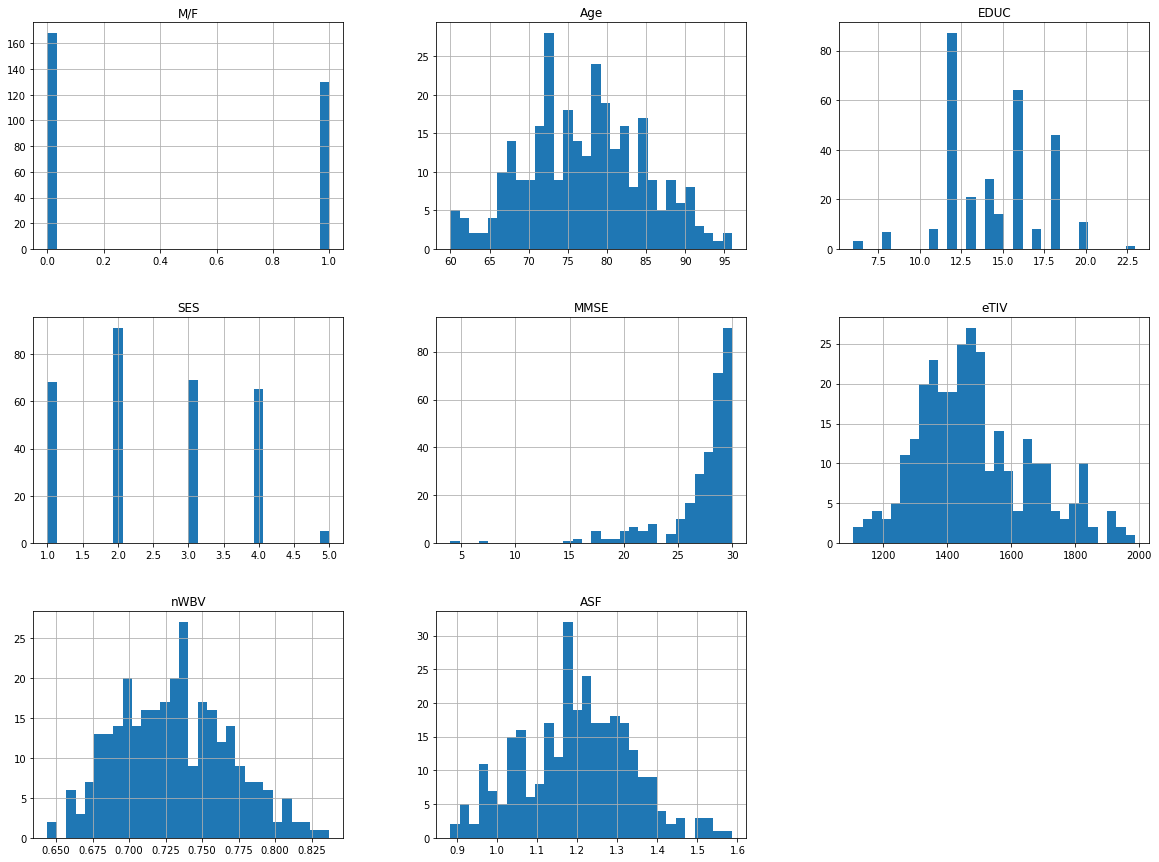

In [22]:
X_trainval.hist(bins=30, figsize=(20,15))
plt.show()

In [23]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig = px.histogram(X_trainval, x='eTIV', nbins=50)
fig.show()

In [24]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig = px.scatter(X_trainval, x='eTIV')
fig.show()

# SVM

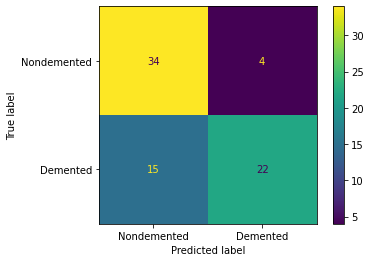

In [25]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [26]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  0.8590604026845637
Test accuracy  0.7466666666666667
Test recall 0.5945945945945946
Test AUC 0.744665718349929


### Optimize parameters(Finetuning) --> GridSearchCV() for SVM

In [27]:
# Normally, C = 1 and gamma = 'scale' are default values
# C controls how wide the margin will be with respect to how many misclassification we are allowing
# C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}


In [28]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

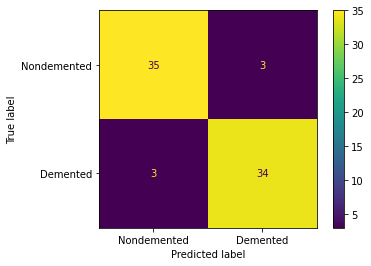

In [29]:
clf_svm = SVC(random_state=42, C=C, gamma=gamma, kernel=kernel)
clf_svm.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [30]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(svm_fpr, svm_tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  1.0
Test accuracy  0.92
Test recall 0.918918918918919
Test AUC 0.9199857752489331


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

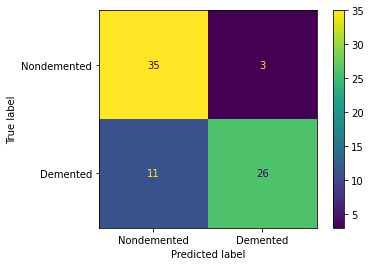

In [32]:
# n_estimators(M) --> the number of trees in the forest
# max_features(d) --> the number of features to consider when looking for the best split
# max_depth(m) --> the maximum depth of the tree.

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(rfc, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [33]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc.score(X_trainval_scaled, y_trainval)
test_score = rfc.score(X_test_scaled, y_test)
y_predict = rfc.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  1.0
Test accuracy  0.8133333333333334
Test recall 0.7027027027027027
Test AUC 0.811877667140825


### Optimize parameters(Finetuning) --> GridSearchCV()

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = range(1,10)

# measure the quality of a split
criterion = ['gini']

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [35]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

In [36]:
optimal_params = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}


In [37]:
bootstrap = optimal_params.best_params_['bootstrap']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']

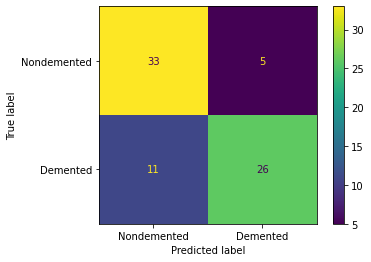

In [38]:
rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_features=max_features, 
                             max_depth=max_depth, 
                             criterion=criterion,
                             bootstrap=bootstrap,
                             random_state=42)

rfc.fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(rfc, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [39]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc.score(X_trainval_scaled, y_trainval)
test_score = rfc.score(X_test_scaled, y_test)
y_predict = rfc.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(rfc_fpr, rfc_tpr)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  0.9966442953020134
Test accuracy  0.7866666666666666
Test recall 0.7027027027027027
Test AUC 0.7855618776671409


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc

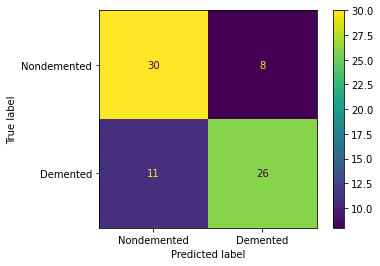

In [41]:
log_reg_model = LogisticRegression().fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(log_reg_model, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [42]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

log_reg_model = LogisticRegression().fit(X_trainval_scaled, y_trainval)
train_score = log_reg_model.score(X_trainval_scaled, y_trainval)
test_score = log_reg_model.score(X_test_scaled, y_test)
scores = log_reg_model.score(X_test_scaled, y_test)
y_predict = log_reg_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  0.8221476510067114
Test accuracy  0.7466666666666667
Test recall 0.7027027027027027
Test AUC 0.7460881934566145


### Optimize parameters(Finetuning) --> GridSearchCV()

In [43]:
param_grid = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1, 2, 3, 5, 10,100,1000]}

optimal_params = GridSearchCV(LogisticRegression(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 2, 'penalty': 'l2'}


In [44]:
# best_score = -10
# for c in range(1, 20):       
#         log_reg_model = LogisticRegression(C=c)
#         scores = cross_val_score(log_reg_model, X_trainval_scaled, y_trainval, cv=5, scoring='accuracy')
        
#         mean_score = scores.mean()
        
#         if mean_score > best_score:
#             best_score = mean_score
#             best_c = c
# print(best_c)

In [45]:
best_C = optimal_params.best_params_['C']
best_penalty = optimal_params.best_params_['penalty']

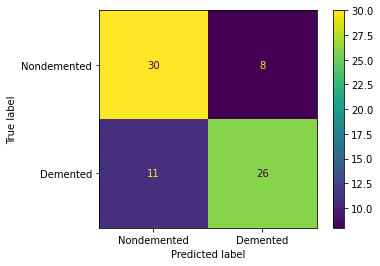

In [46]:
log_reg_model = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(log_reg_model, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [47]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

best_log_reg_model = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_trainval_scaled, y_trainval)
train_score = best_log_reg_model.score(X_trainval_scaled, y_trainval)
test_score = best_log_reg_model.score(X_test_scaled, y_test)
y_predict = best_log_reg_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
lgr_fpr, lgr_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(lgr_fpr, lgr_tpr)

print("Train accuracy with Logistec regression:", train_score)
print("Test accuracy with Logistec regression:", test_score)
print("Test recall with Logistec regression:", test_recall)
print("Test AUC with Logistec regression:", test_auc)

Train accuracy with Logistec regression: 0.8288590604026845
Test accuracy with Logistec regression: 0.7466666666666667
Test recall with Logistec regression: 0.7027027027027027
Test AUC with Logistec regression: 0.7460881934566145


# Decision Tree

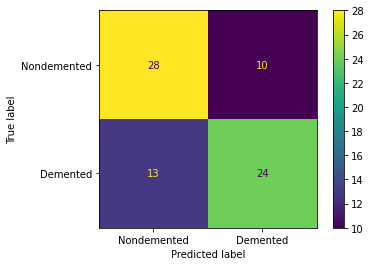

In [48]:
dt_model = DecisionTreeClassifier().fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(dt_model, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [49]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

dt_model = DecisionTreeClassifier().fit(X_trainval_scaled, y_trainval)
train_score = dt_model.score(X_trainval_scaled, y_trainval)
test_score = dt_model.score(X_test_scaled, y_test)
y_predict = dt_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)

print("Train accuracy with DecisionTreeClassifier:", train_score)
print("Test accuracy with DecisionTreeClassifier:", test_score)
print("Test recall with DecisionTreeClassifier:", test_recall)
print("Test AUC with DecisionTreeClassifier:", test_auc)

Train accuracy with DecisionTreeClassifier: 1.0
Test accuracy with DecisionTreeClassifier: 0.72
Test recall with DecisionTreeClassifier: 0.6756756756756757
Test AUC with DecisionTreeClassifier: 0.719416785206259


### Optimize parameters(Finetuning) --> GridSearchCV()

In [50]:
param_grid = {'criterion': ['gini'], 
              'max_depth': range(1,10)}

optimal_params = GridSearchCV(DecisionTreeClassifier(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [51]:
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']

In [52]:
# best_score = -1
# for d in range(1, 25):       
#         dt_model = DecisionTreeClassifier(max_depth = d)
#         scores = cross_val_score(dt_model, X_trainval_scaled, y_trainval, cv=5, scoring='accuracy')
        
#         mean_score = scores.mean()
        
#         if mean_score > best_score:
#             best_score = mean_score
#             best_d = d
# print(best_d)

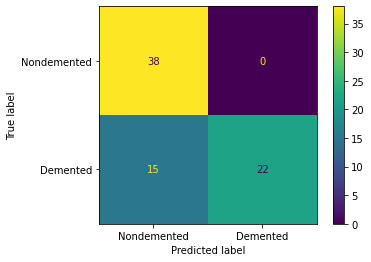

In [53]:
dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(dt_model, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [54]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_trainval_scaled, y_trainval)
train_score = dt_model.score(X_trainval_scaled, y_trainval)
test_score = dt_model.score(X_test_scaled, y_test)
y_predict = dt_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(dt_fpr, dt_tpr)

print("Train accuracy with DecisionTreeClassifier:", train_score)
print("Test accuracy with DecisionTreeClassifier:", test_score)
print("Test recall with DecisionTreeClassifier:", test_recall)
print("Test AUC with DecisionTreeClassifier:", test_auc)

Train accuracy with DecisionTreeClassifier: 0.7751677852348994
Test accuracy with DecisionTreeClassifier: 0.8
Test recall with DecisionTreeClassifier: 0.5945945945945946
Test AUC with DecisionTreeClassifier: 0.7972972972972974


## Plot ROC and compare AUC

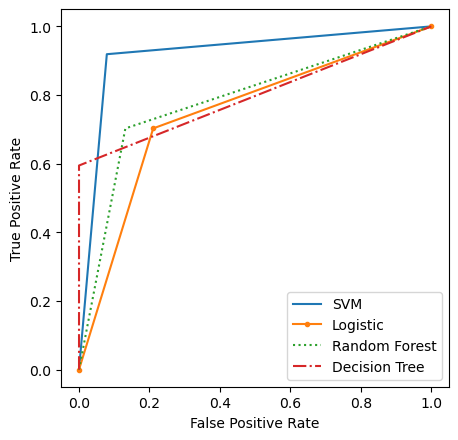

In [55]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM')
plt.plot(lgr_fpr, lgr_tpr, marker='.', label='Logistic')
plt.plot(rfc_fpr, rfc_tpr, linestyle=':', label='Random Forest')
plt.plot(dt_fpr, dt_tpr, linestyle='-.', label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()